#### Import Module

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from setting import *

#### Load Data

In [2]:
data = pd.read_csv('../../selected_data/3_content_bold_color_img/pca_512_3.csv')
data

,id,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_504,PC_505,PC_506,PC_507,PC_508,PC_509,PC_510,PC_511,PC_512,success_x
0,NMN2,-0.255037,-0.043317,0.014301,-0.043538,0.005360,-0.030645,0.014090,-0.028646,-0.010741,...,-0.000204,-0.000081,-0.000151,-0.000121,-0.000009,-0.000041,0.000024,0.000194,0.000048,1
1,ZENLET-The-Dual,-0.255037,-0.043317,0.014301,-0.043538,0.005360,-0.030645,0.014090,-0.028646,-0.010741,...,-0.000204,-0.000081,-0.000151,-0.000121,-0.000009,-0.000041,0.000024,0.000194,0.000048,1
2,hhl-penzhai,0.088848,-0.030828,-0.030503,-0.019819,-0.058715,-0.042420,-0.005115,0.003989,0.019893,...,-0.001539,-0.001324,-0.020540,0.015352,0.003413,0.003403,0.003554,-0.006049,0.015237,1
3,scion-36,-0.255037,-0.043317,0.014301,-0.043538,0.005360,-0.030645,0.014090,-0.028646,-0.010741,...,-0.000204,-0.000081,-0.000151,-0.000121,-0.000009,-0.000041,0.000024,0.000194,0.000048,1
4,amt-cube,0.403076,-0.030625,-0.029266,-0.027533,0.020048,-0.057964,-0.038069,-0.018937,0.007342,...,0.019413,0.000568,0.001280,-0.006241,-0.000394,0.001162,-0.009600,0.002963,-0.017525,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,wlm-tw,-0.200411,0.067552,-0.095851,0.066186,-0.015725,0.045577,-0.044576,0.005955,-0.015264,...,0.004280,0.001492,-0.012047,-0.030217,-0.002628,-0.014648,-0.009382,-0.009278,0.021727,0
5608,8bowchou,-0.255037,-0.043317,0.014301,-0.043538,0.005360,-0.030645,0.014090,-0.028646,-0.010741,...,-0.000204,-0.000081,-0.000151,-0.000121,-0.000009,-0.000041,0.000024,0.000194,0.000048,0
5609,bananalin,-0.255037,-0.043317,0.014301,-0.043538,0.005360,-0.030645,0.014090,-0.028646,-0.010741,...,-0.000204,-0.000081,-0.000151,-0.000121,-0.000009,-0.000041,0.000024,0.000194,0.000048,0
5610,fooddesignlab,-0.255037,-0.043317,0.014301,-0.043538,0.005360,-0.030645,0.014090,-0.028646,-0.010741,...,-0.000204,-0.000081,-0.000151,-0.000121,-0.000009,-0.000041,0.000024,0.000194,0.000048,0


In [3]:
x_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]
y_data.value_counts()

success_x
1    4286
0    1326
Name: count, dtype: int64

In [4]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

# --- Split Data ---
norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(norm_x_data, y_data, test_size=0.3, random_state=30)
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=30)

# Undersample
sampler = RandomUnderSampler()
under_train_x, under_train_y = sampler.fit_resample(train_x, train_y)

# Undersample
sampler = RandomOverSampler()
over_train_x, over_train_y = sampler.fit_resample(train_x, train_y)

#### Naive Bayes
> ref: https://scikit-learn.org/stable/modules/naive_bayes.html
* 模型選擇： Complement NB（不可使用負數，需先經過正規化）
* 使用資料：正規化後資料

---- Normalized Data ----
Accuracy: 0.6
Recall: 0.56
Precision: 0.85
F1-Score: 0.68
F0.5-Score: 0.77
F0.3-Score: 0.81


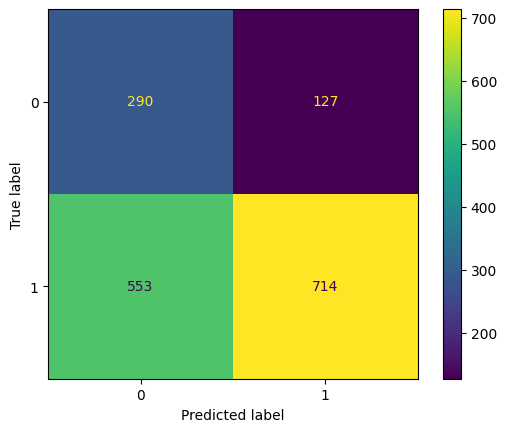

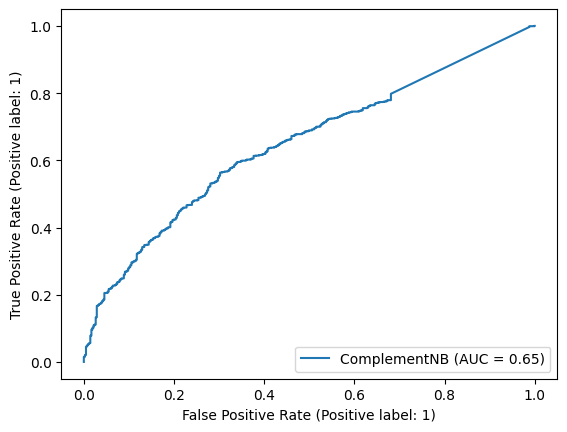

In [5]:
print('---- Normalized Data ----')

model = ComplementNB()
model.fit(norm_train_x, norm_train_y)

pred_y = model.predict(norm_test_x)

result_report(model, norm_test_x, norm_test_y, pred_y)

#### Logistic Regression
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 模型選擇： Logistic Regression
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 1.0
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


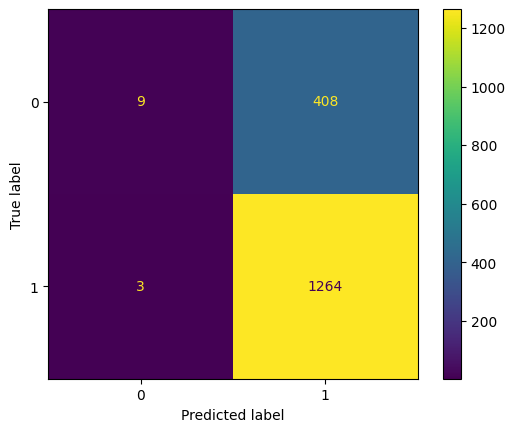

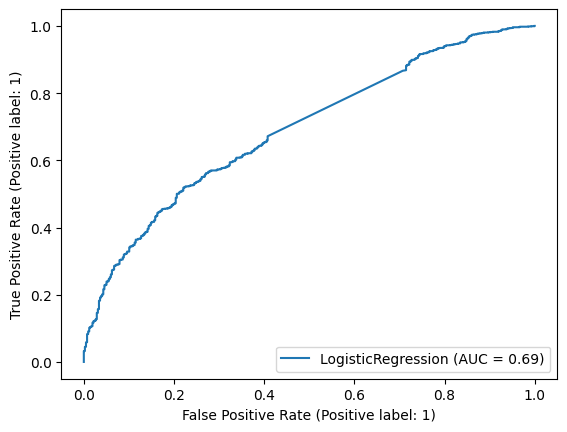

---- Under Sample Data ----
Accuracy: 0.59
Recall: 0.54
Precision: 0.87
F1-Score: 0.67
F0.5-Score: 0.77
F0.3-Score: 0.83


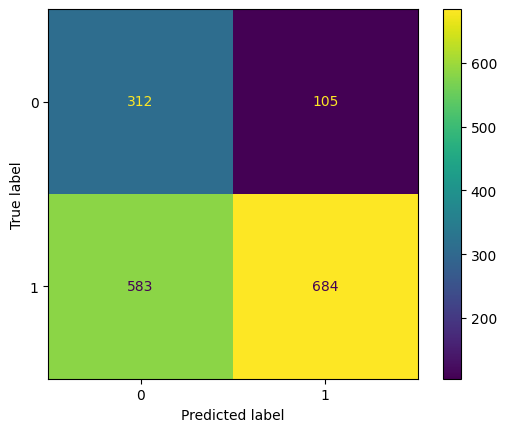

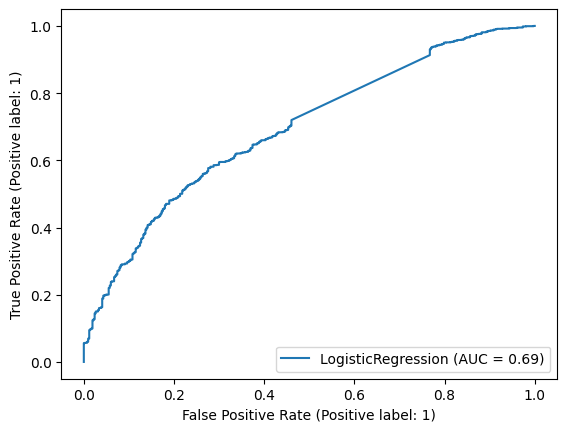

---- Over Sample Data ----
Accuracy: 0.6
Recall: 0.58
Precision: 0.85
F1-Score: 0.69
F0.5-Score: 0.78
F0.3-Score: 0.82


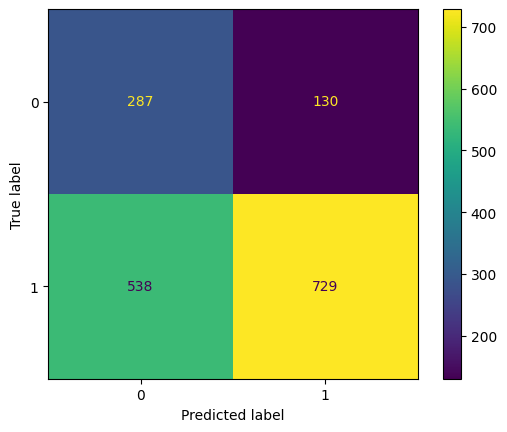

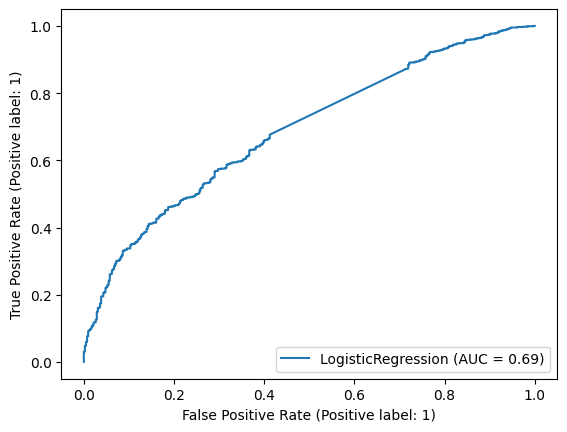

In [6]:
print('---- Original Data ----')
model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = LogisticRegression()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = LogisticRegression()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### SVM
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* 模型選擇：SVC
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 1.0
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.77


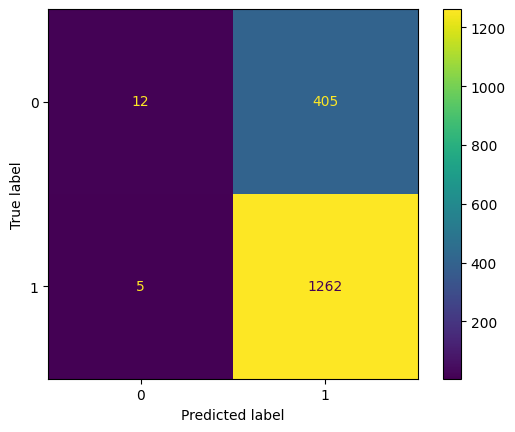

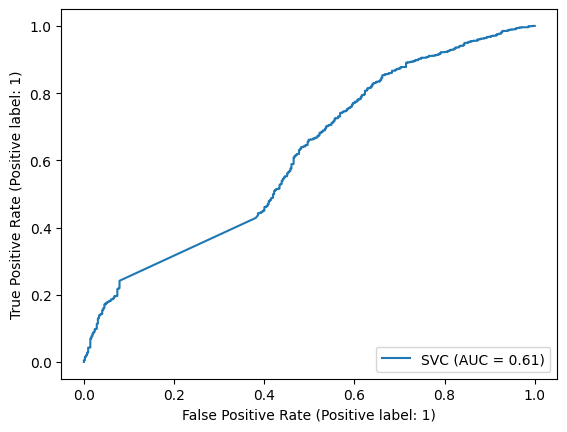

---- Under Sample Data ----
Accuracy: 0.58
Recall: 0.53
Precision: 0.86
F1-Score: 0.66
F0.5-Score: 0.77
F0.3-Score: 0.82


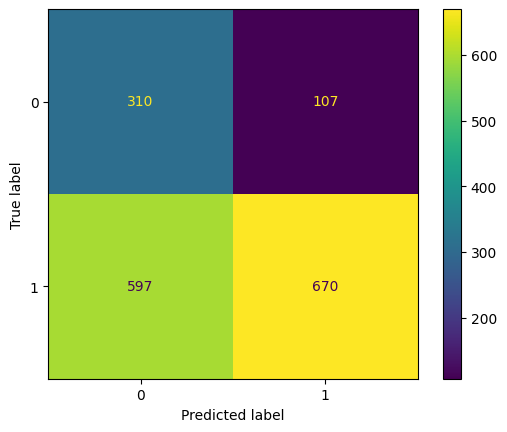

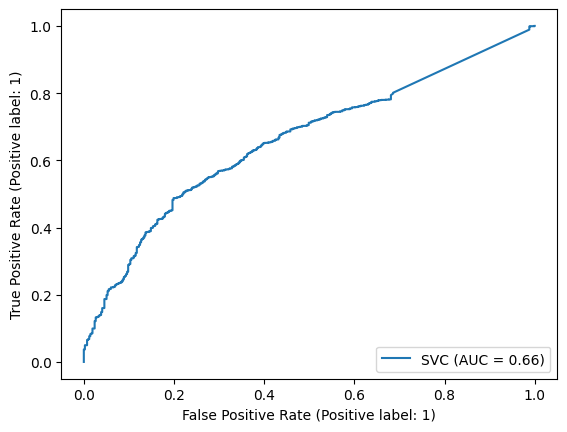

---- Over Sample Data ----
Accuracy: 0.65
Recall: 0.71
Precision: 0.81
F1-Score: 0.75
F0.5-Score: 0.79
F0.3-Score: 0.8


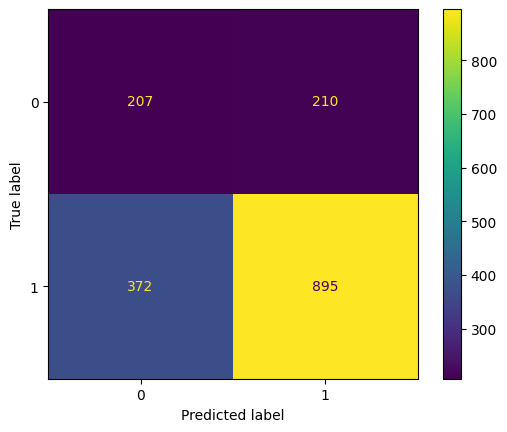

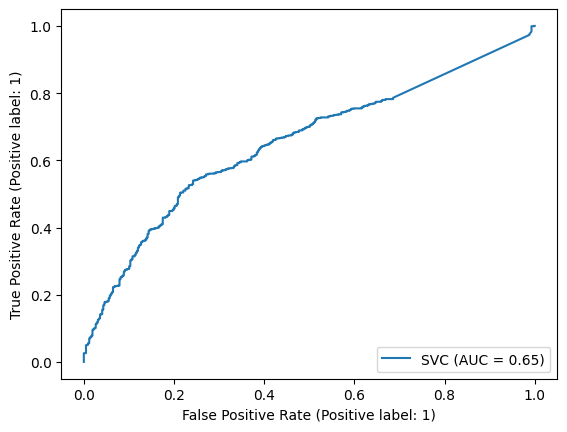

In [7]:
print('---- Original Data ----')
model = SVC()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = SVC()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = SVC()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### Random Forest

> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 模型選擇： Random Forest
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.99
Precision: 0.75
F1-Score: 0.85
F0.5-Score: 0.79
F0.3-Score: 0.77


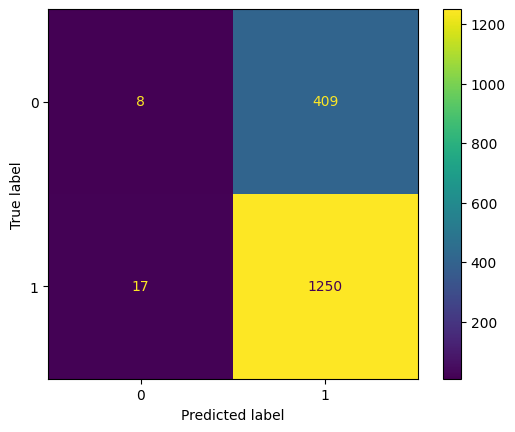

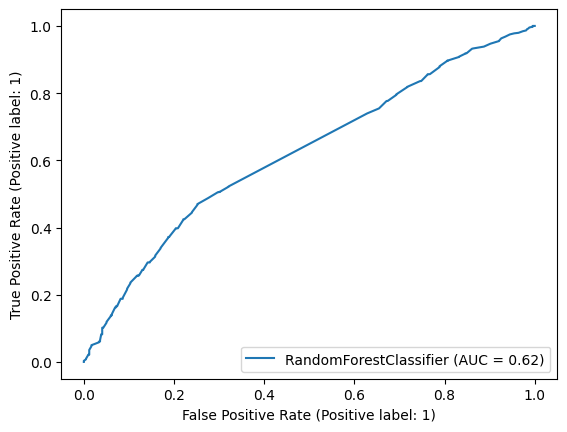

---- Under Sample Data ----
Accuracy: 0.56
Recall: 0.51
Precision: 0.85
F1-Score: 0.63
F0.5-Score: 0.75
F0.3-Score: 0.8


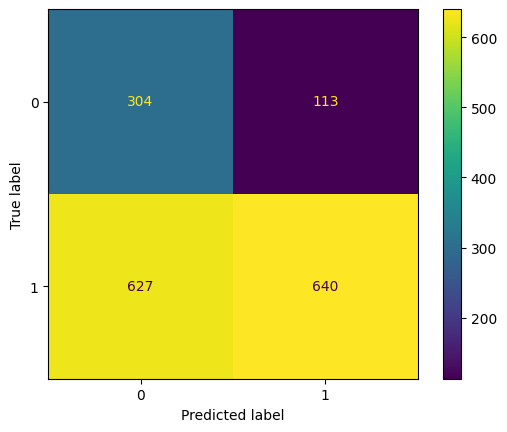

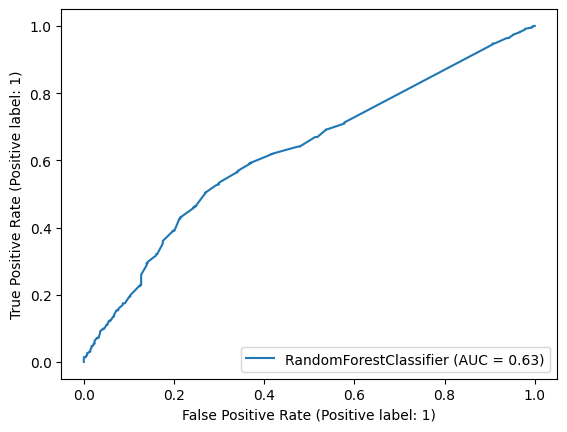

---- Over Sample Data ----
Accuracy: 0.67
Recall: 0.78
Precision: 0.78
F1-Score: 0.78
F0.5-Score: 0.78
F0.3-Score: 0.78


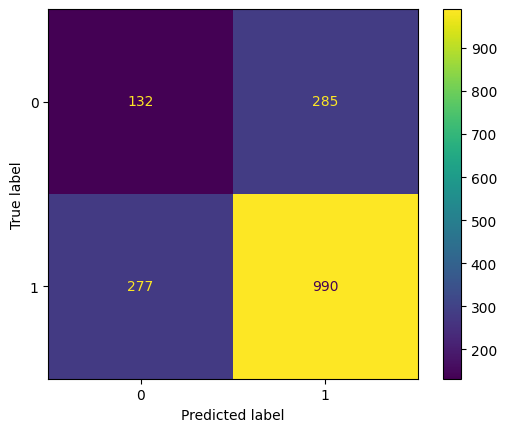

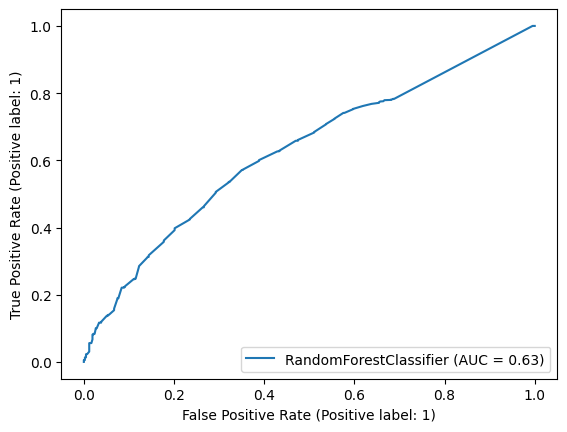

In [8]:
print('---- Original Data ----')
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = RandomForestClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = RandomForestClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### XGBoost
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* 選擇模型：GradientBoostingClassifier
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 0.99
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.78


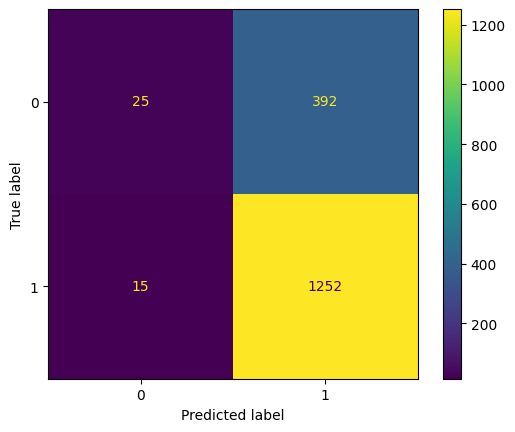

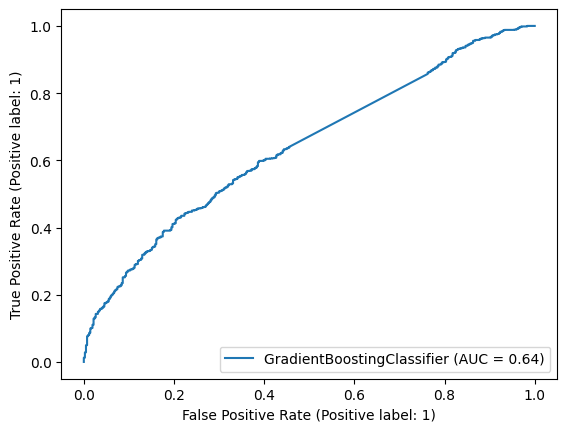

---- Under Sample Data ----
Accuracy: 0.56
Recall: 0.52
Precision: 0.83
F1-Score: 0.64
F0.5-Score: 0.74
F0.3-Score: 0.79


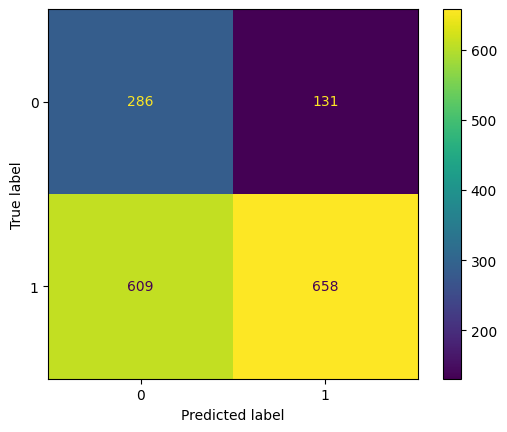

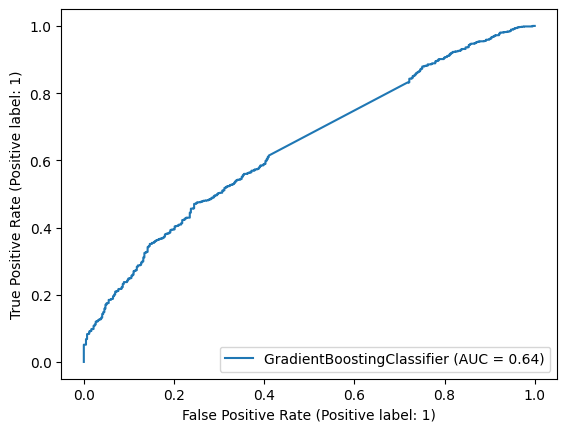

---- Over Sample Data ----
Accuracy: 0.63
Recall: 0.66
Precision: 0.82
F1-Score: 0.73
F0.5-Score: 0.78
F0.3-Score: 0.8


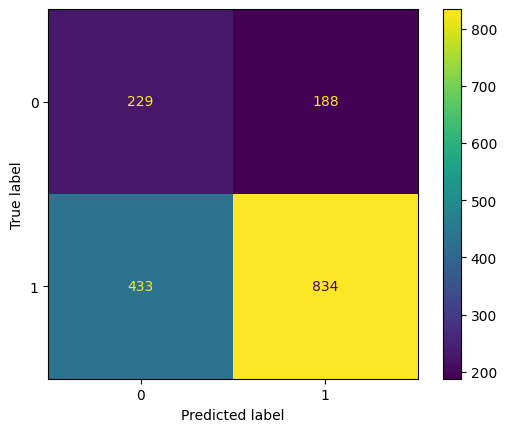

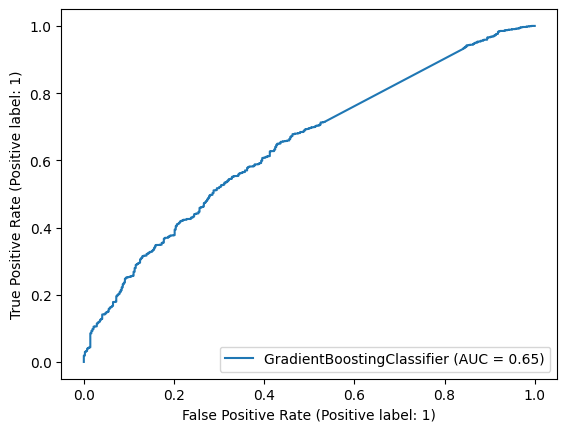

In [9]:
print('---- Original Data ----')
model = GradientBoostingClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = GradientBoostingClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = GradientBoostingClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)
